In [309]:
import urllib3
import json
import requests
import pandas as pd
from ggplot import *
import datetime
import seaborn as sns

%matplotlib inline


In [370]:
forecast_URL='http://api.wunderground.com/api/ffe387ffbb96e60e/hourly/q/CA/San_Francisco.json'
yesterday_URL='http://api.wunderground.com/api/ffe387ffbb96e60e/yesterday/q/CA/San_Francisco.json'

forecast_data = requests.get(forecast_URL).json()
yesterday_data = requests.get(yesterday_URL).json()


In [418]:
forecast = pd.DataFrame.from_dict(forecast_data['hourly_forecast'])

#Convert Dictionary to Dataframe and grab only relevant columns
forecast = forecast[['FCTTIME','temp']]
forecast['hour'] = forecast.FCTTIME.apply(lambda x: x.get('hour'))
forecast['day'] = forecast.FCTTIME.apply(lambda x: x.get('mday'))
forecast['temp']= forecast.temp.apply(lambda x: x.get('english'))
forecast.drop(['FCTTIME'], inplace=True, axis=1)

#Get data for today
now = datetime.datetime.now()
forecast = forecast[forecast['day'] == str(now.day) ]
forecast = forecast.apply(pd.to_numeric)

print((forecast['hour'] == 23).any())

for i in range(0,24):
    if (forecast['hour'] == i).any():
        forecast = forecast.append(pd.DataFrame({'hour': i, 'day': now.day, 'temp':0}, index=[0]), ignore_index=True)

print(forecast)

SyntaxError: invalid syntax (<ipython-input-418-63765667c17a>, line 18)

In [323]:
yesterday = yesterday_data['history']['observations']
yesterday = pd.DataFrame.from_dict(yesterday)

#Convert Dictionary to Dataframe and grab only relevant columns
yesterday = yesterday[['date','tempi']]
yesterday['hour'] = yesterday.date.apply(lambda x: x.get('hour'))
yesterday['day'] = yesterday.date.apply(lambda x: x.get('mday'))
yesterday['temp']= yesterday.tempi
yesterday.drop(['date', 'tempi'], inplace=True, axis=1)

yesterday = yesterday.apply(pd.to_numeric)


In [312]:
#Combine Data Frame
alldata = [yesterday, forecast]
alldata = pd.concat(alldata)

alldata = alldata.apply(pd.to_numeric)
alldata['subject'] = 0




    day  hour  temp  subject
0    20     0  57.9        0
1    20     1  57.0        0
2    20     2  57.0        0
3    20     3  57.0        0
4    20     4  55.9        0
5    20     5  55.9        0
6    20     6  57.0        0
7    20     7  57.9        0
8    20     8  61.0        0
9    20     9  62.1        0
10   20    10  63.0        0
11   20    11  64.9        0
12   20    12  66.0        0
13   20    13  66.9        0
14   20    14  66.9        0
15   20    15  66.9        0
16   20    16  66.9        0
17   20    17  64.9        0
18   20    18  63.0        0
19   20    19  61.0        0
20   20    20  59.0        0
21   20    21  59.0        0
22   20    22  57.9        0
23   20    23  57.9        0
0    21    15  67.0        0
1    21    16  66.0        0
2    21    17  66.0        0
3    21    18  65.0        0
4    21    19  64.0        0
5    21    20  62.0        0
6    21    21  60.0        0
7    21    22  59.0        0
8    21    23  58.0        0


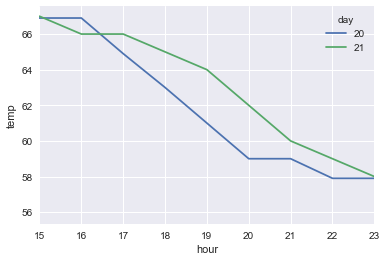

In [302]:
tempplot = sns.tsplot(data=alldata, time='hour', condition='day', value='temp', unit='subject')


(30, 3)
(24, 3)


ValueError: Argument dimensions are incompatible

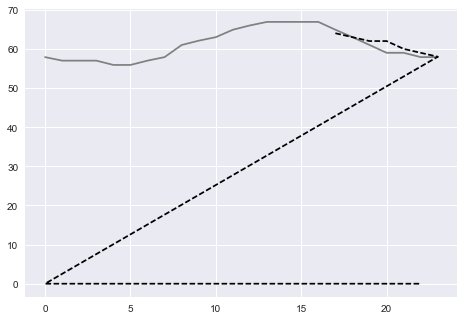

In [407]:
print(forecast.shape)
print(yesterday.shape)

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.plot(yesterday.hour, yesterday.temp, 'gray')
ax.plot(forecast.hour, forecast.temp, 'black', ls="--")

ax.fill_between(yesterday.hour, forecast.temp, yesterday.temp)

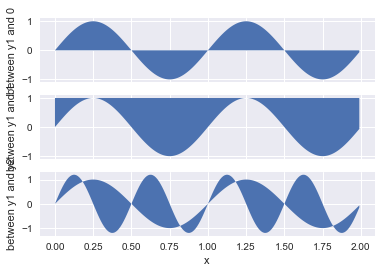

In [307]:

import matplotlib.pyplot as plt
import numpy as np

x = np.arange(0.0, 2, 0.01)
y1 = np.sin(2*np.pi*x)
y2 = 1.2*np.sin(4*np.pi*x)

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)

ax1.fill_between(x, 0, y1)
ax1.set_ylabel('between y1 and 0')

ax2.fill_between(x, y1, 1)
ax2.set_ylabel('between y1 and 1')

ax3.fill_between(x, y1, y2)
ax3.set_ylabel('between y1 and y2')
ax3.set_xlabel('x')
